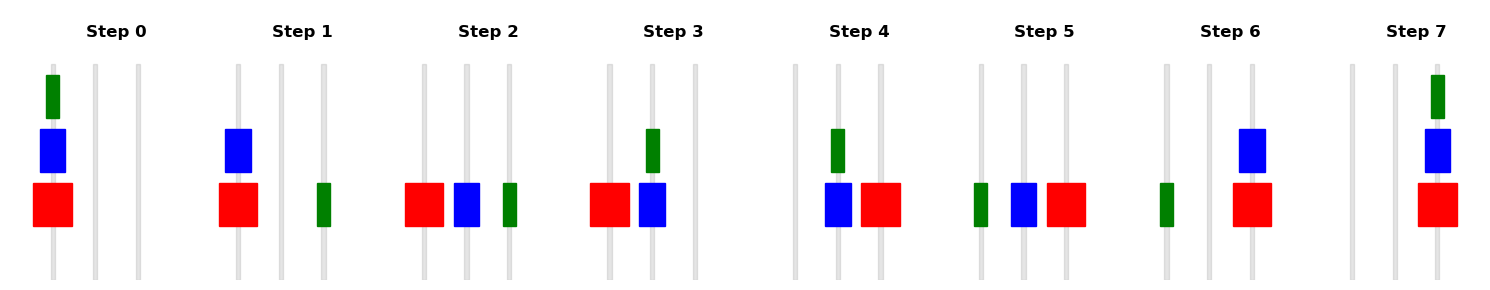

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 初期設定
num_disks = 3
pegs = [list(range(num_disks, 0, -1)), [], []]

# 各ステップを保存するリスト
steps = []

def save_step(pegs):
    steps.append([list(peg) for peg in pegs])

def move_disk(from_peg, to_peg, pegs):
    disk = pegs[from_peg].pop()
    pegs[to_peg].append(disk)
    save_step(pegs)

def hanoi(n, source, target, auxiliary, pegs):
    if n == 1:
        move_disk(source, target, pegs)
    else:
        hanoi(n-1, source, auxiliary, target, pegs)
        move_disk(source, target, pegs)
        hanoi(n-1, auxiliary, target, source, pegs)

# 初期状態を保存
save_step(pegs)

# ハノイの塔を解く
hanoi(num_disks, 0, 2, 1, pegs)

# 図を描画
fig, axes = plt.subplots(1, len(steps), figsize=(15, 3))

peg_colors = ['red', 'green', 'blue']
for idx, (ax, step) in enumerate(zip(axes, steps)):
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, num_disks + 2)
    ax.axis('off')
    ax.text(1.5, num_disks + 1.5, f'Step {idx}', horizontalalignment='center', fontsize=12, weight='bold')
    for i, peg in enumerate(step):
        ax.add_patch(patches.Rectangle((i - 0.05, 0), 0.1, num_disks + 1, color='gray', alpha=0.2))
        for j, disk in enumerate(peg):
            width = disk * 0.3
            ax.add_patch(patches.Rectangle((i - width / 2, j + 1), width, 0.8, color=peg_colors[disk % 3]))

plt.tight_layout()
plt.show()
